# Multi-layer Perceptron

Learning the math behind neural networks by creating a multi-layer perceptron using numpy that emulates an XOR gate, we will have 4 different instances of inputs for our model; (0,0) (0,1) (1,0) (1,1) and our expected outputs are 0 1 1 0 respectively

## Model Training

### Model Architecture

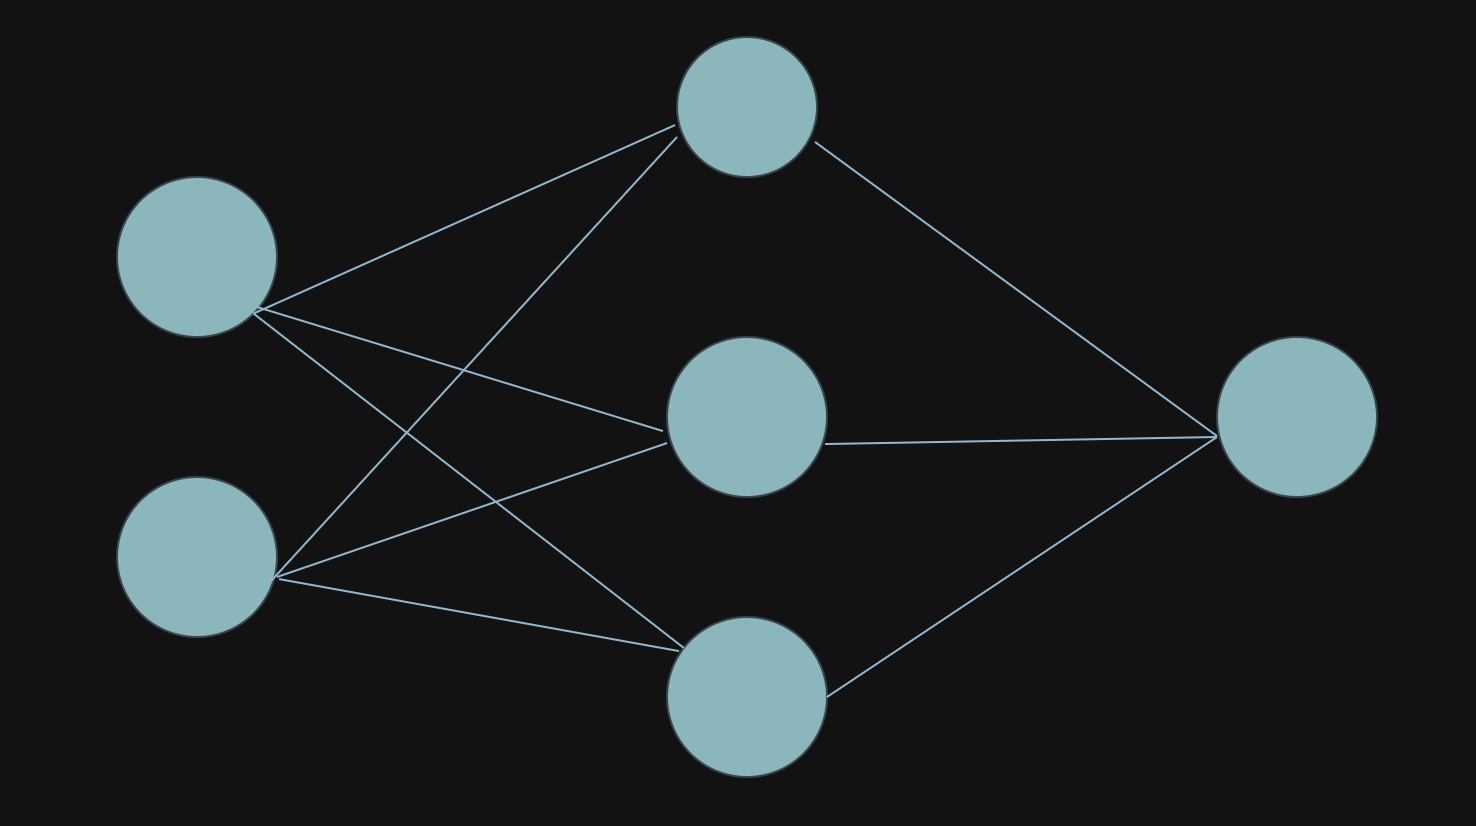

### Training Method

The code starts by intially randomising the weights.

It then calculates the value of the hidden layer nodes by summing the product of the respective input node and weights and then feeding those values into the activation function which in this case is the Sigmoid function ($\frac{1}{1 - e^{-x}}$)

It then calculates the value of the final output node by summing the product of the hidden node values and weights and then feeding those values into an activation function which in this case is again the Sigmoid function (This step and the previous step is repeated for all 4 instances of the inputs)

The error is then calculated for each of the output nodes values, this is calculated with the formula

$error = \frac{1}{2} * (expected{\textunderscore}output - actual{\textunderscore}output)^2$

Then using backpropagation, the model will update its weights for every epoch

### Backpropagation

#### Model architecture (with labels)

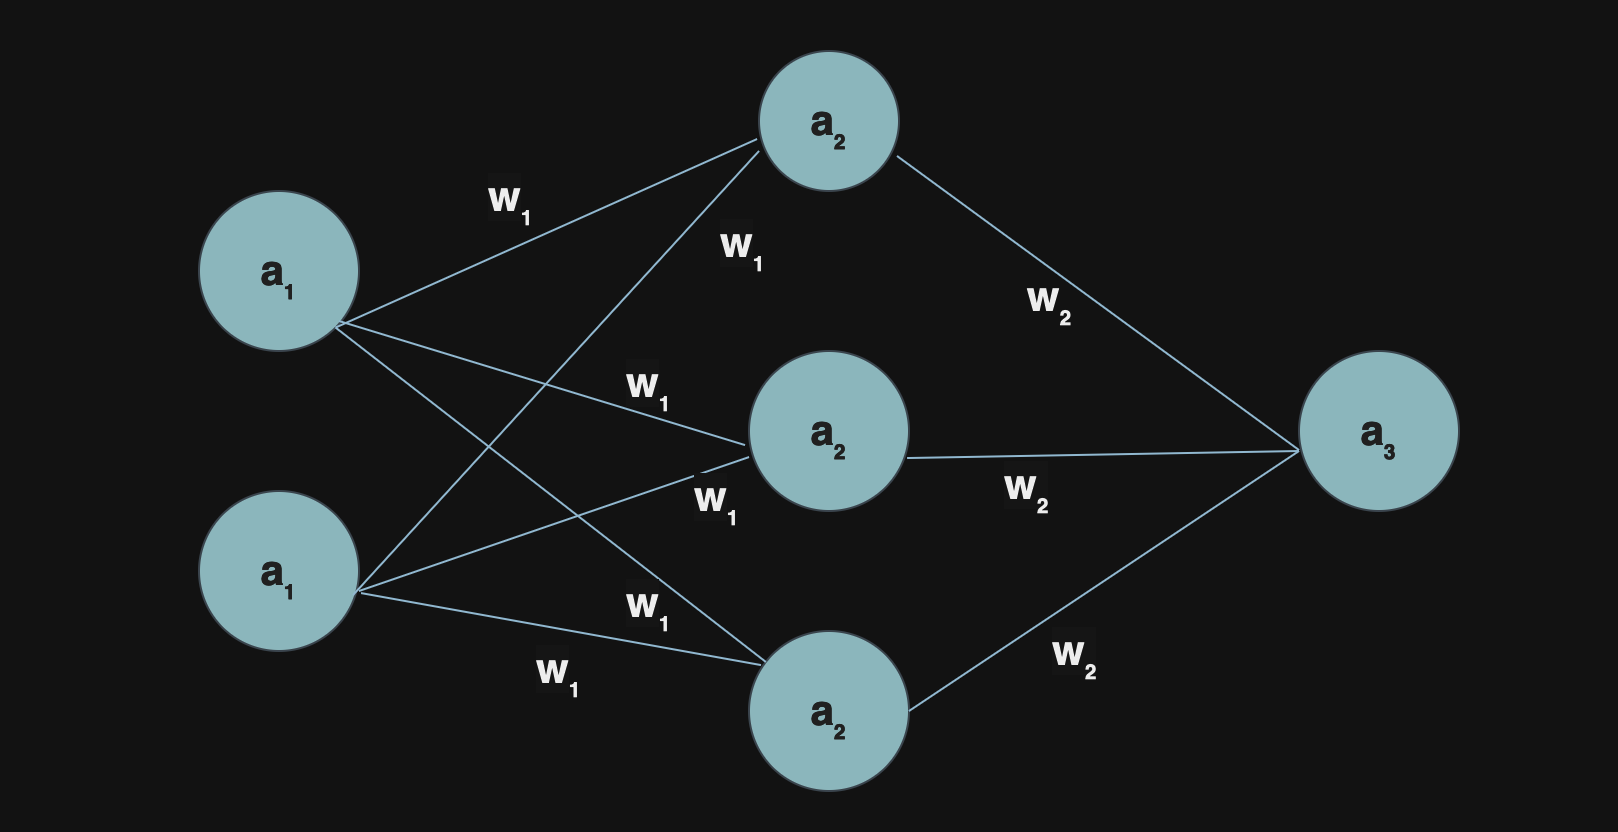

To calculate the relationship between our cost function and our weights we can apply the chain rule to get  the following formula:

$\Large{\frac{\partial C}{\partial w} = \frac{\partial C}{\partial a} * \frac{\partial a}{\partial z} * \frac{\partial z}{\partial w}}$

where

$\textrm{C = cost function}$

$\textrm{w = weight being adjusted}$

$\textrm{a = node value (after activation function is applied)}$

$\textrm{z = node value (before activation function is applied)}$

#### Hidden Layer to Output Layer weights

For our weights that connect from the hidden layer to the output layer ${w_2}$ we use the following equations:

$\large{{z_3} = {a_2} * {w_2} \rightarrow{\frac{\partial z_3}{\partial w_2} = {a_2}}}$

$\large{{a_3} = \sigma{(z_3)}} \rightarrow{\frac{\partial a_3}{\partial z_3}} = {\sigma^{\prime}{(z_3)}}$

$\large{{C} = \frac{1}{2} * ({a_3} - {error})^2} \rightarrow{\frac{\partial C}{\partial a_3}} = {({a_3} - {error})}$

Therefore the relationship between our weights $w_2$ and our Cost function $C$ is:

$\large{\frac{\partial C}{\partial w} = {a_2} * {\sigma^{\prime}{(z_3)}} * {({a_3} - {error})}}$

so our weight update function will be:

$\large{{w_2} = {w_2} - ({a_2} * {\sigma^{\prime}{(z_3)}} * {({a_3} - {error}) * learning\textunderscore{rate})}}$

#### Input Layer to Hidden Layer weights

For our weights $\large{w_1}$ we can derive $\large{{\frac{\partial z_2}{\partial w_1}}}$ and 
$\large{\frac{\partial a_2}{\partial z_2}}$ with the same method as earlier

$\large{{z_2} = {a_1} * {w_1} \rightarrow{\frac{\partial z_2}{\partial w_1} = {a_1}}}$

$\large{{a_2} = \sigma{(z_2)}} \rightarrow{\frac{\partial a_2}{\partial z_2}} = {\sigma^{\prime}{(z_2)}}$

To calculate $\large{{\frac{\partial C}{\partial a_2}}}$ however, we will use chain rule to consider the following equation:

$\large{\frac{\partial C}{\partial a_2} = \frac{\partial C}{\partial a_3} * \frac{\partial a_3}{\partial z_3} * \frac{\partial z_3}{\partial a_2}}$

and we find that

$\large{\frac{\partial C}{\partial a_3}} = {({a_3} - {error})}$ (derived above)

$\large{\frac{\partial a_3}{\partial z_3}} = {\sigma^{\prime}{(z_3)}}$ (derived above)

$\large{{z_3} = {a_2} * {w_2} \rightarrow{\frac{\partial z_3}{\partial a_2} = {w_2}}}$

Therfore the relationship between our Cost function $C$ and our weights $w_1$ will be

$\large{\frac{\partial C}{\partial w_1} = {a_1} * {\sigma^{\prime}{(z_2)}} * {w_2} * {\sigma^{\prime}{(z_3)}} * {({a_3} - {error})}}$

and our weight update equation will be:

$\large{{w_1} = {w_1} - ({a_1} * {\sigma^{\prime}{(z_2)}} * {w_2} * {\sigma^{\prime}{(z_3)}} * {({a_3} - {error}) * learning\textunderscore{rate})}}$

## Code

In [15]:
import numpy as np

In [16]:
def sigmoid(sum):
    return (1 / (1 + np.exp(-sum)))

In [17]:
def sigmoid_derivative(val):
    ans = sigmoid(val) * (1 - sigmoid(val))
    return ans

In [18]:
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
weights1 = np.random.rand(2, 3) 
weights2 = np.random.rand(3, 1)
outputsExp = np.array([[0], [1], [1], [0]])
NumOfEpochs = 800000
learning_rate = 0.1


for epoch in range(NumOfEpochs):
    input_layer = inputs
    hidden_layer_sum = np.dot(input_layer, weights1)
    hidden_layer = sigmoid(hidden_layer_sum)

    output_node_sum = np.dot(hidden_layer, weights2)
    output_node = sigmoid(output_node_sum)

    error = 0.5 * ((output_node - outputsExp)**2)
    error_deriv = (output_node - outputsExp)
    average_error = np.mean(abs(error))
    
    output_derivative = sigmoid_derivative(output_node_sum)
    output_delta = error_deriv * output_derivative

    weights2T = weights2.T
    delta_output_weights = np.dot(output_delta, weights2T)
    delta_hidden = delta_output_weights * sigmoid_derivative(hidden_layer_sum)

    hidden_layerT = hidden_layer.T
    input_x_delta1 = np.dot(hidden_layerT, output_delta)
    weights2 = weights2 - (input_x_delta1 * learning_rate)
  
    input_layerT = input_layer.T
    input_x_delta0 = np.dot(input_layerT, delta_hidden)
    weights1 = weights1 - (input_x_delta0 * learning_rate)
        

In [19]:
weights1

array([[ 5.93666487,  6.98542648, -4.64133187],
       [ 5.9105283 , -4.6549978 ,  6.94540419]])

In [20]:
weights2

array([[ 19.30499027],
       [-14.13533191],
       [-14.1362542 ]])

In [22]:
error

array([[6.23836518e-05],
       [2.25340763e-05],
       [2.25382457e-05],
       [1.29456422e-06]])

In [21]:
output_node

array([[0.01116993],
       [0.99328672],
       [0.9932861 ],
       [0.00160908]])

Our model works perfectly as our output nodes $\approx$ the outputs of an XOR gate